In [ ]:
#Install packages

library(tidyverse)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#Import dataset

vg <- read.csv("vgsales.csv")

In [ ]:
#View dataset

head(vg)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [ ]:
#View the structure and summary of the dataset

str(vg)
summary(vg)

'data.frame':	16598 obs. of  11 variables:
 $ Rank        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name        : chr  "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year        : chr  "2006" "1985" "2008" "2009" ...
 $ Genre       : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num  41.5 29.1 15.8 15.8 11.3 ...
 $ EU_Sales    : num  29.02 3.58 12.88 11.01 8.89 ...
 $ JP_Sales    : num  3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales : num  8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ Global_Sales: num  82.7 40.2 35.8 33 31.4 ...


      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

In [ ]:
#Convert the Year column from character to integer

vg$Year<- as.integer(as.character(vg$Year))

is.integer(vg$Year)

Warning message:
“NAs introduced by coercion”


[1] TRUE

In [ ]:
#Check for blank rows

is.null(vg)

[1] FALSE

In [ ]:
#Remove N/A values from Year column

vgs <- vg %>%
drop_na(Year)

dim(vgs)

[1] 16327    11

In [ ]:
#Save new data

vgs %>%
write.csv ("vgs")

In [ ]:
Genre <- vgs %>%
group_by (Genre) %>%
summarize(count=n()) %>%
arrange(desc(count))

View(Genre)

Genre,count
<chr>,<int>
Action,3253
Sports,2304
Misc,1710
Role-Playing,1471
Shooter,1282
Adventure,1276
Racing,1226
Platform,876
Simulation,851


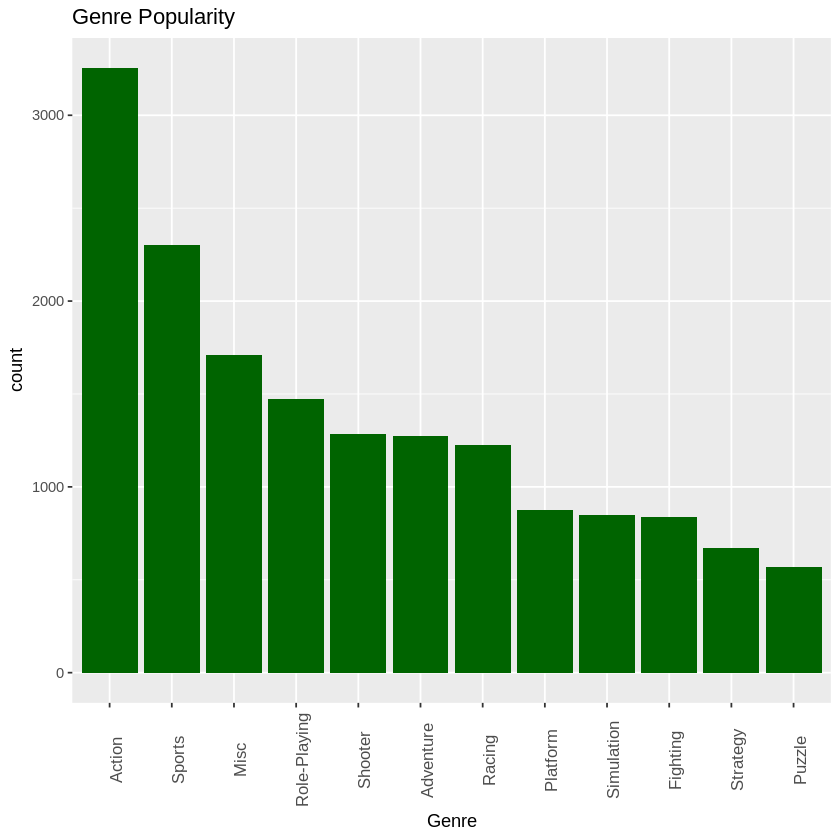

In [ ]:
ggplot((data = Genre), aes(x = reorder(Genre, - count), y = count)) + geom_col (fill = "Dark Green") + labs(title = "Genre Popularity", x = "Genre") + theme(axis.text.x= element_text(size =10, angle = 90))

`summarise()` has grouped output by 'Genre'. You can override using the
`.groups` argument.


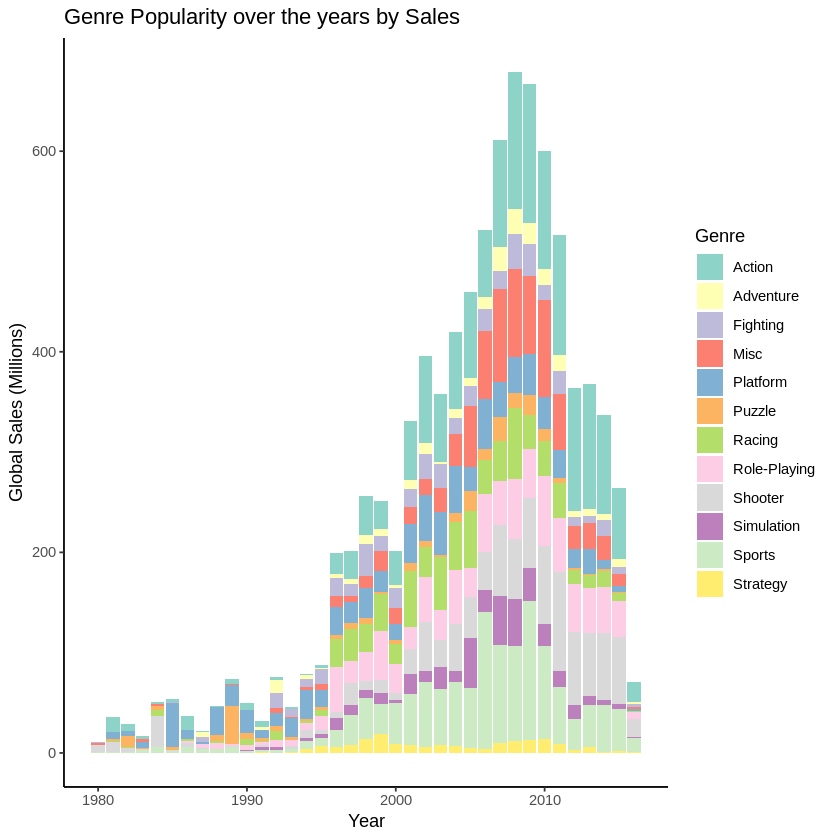

In [ ]:
vgs %>%
filter(Year < 2017) %>%
group_by (Genre, Year) %>%
summarize(total_sales = sum(Global_Sales)) %>%
ggplot(aes(x = Year, y = total_sales, fill = Genre)) + geom_col() + scale_fill_brewer(palette = "Set3") + theme_classic() + labs(title = "Genre Popularity over the years by Sales", y = "Global Sales (Millions)")

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


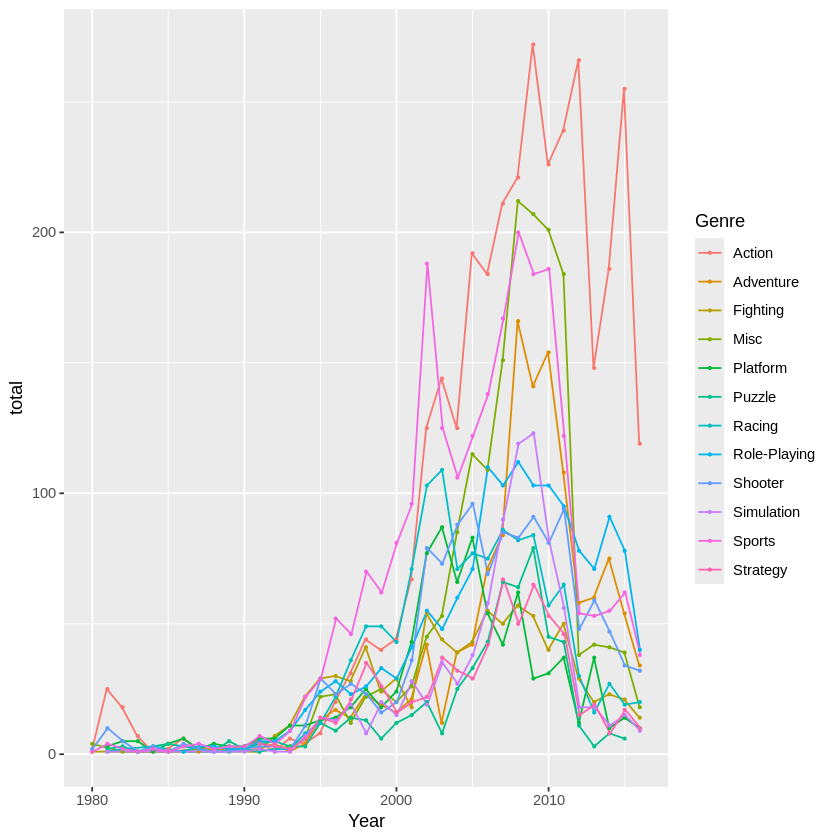

In [ ]:
genres <- subset(vgs, select = c(Year, Genre)) %>%
filter(Year < 2017) %>%
group_by(Year, Genre) %>%
summarize (total = n())
ggplot(genres, aes(x = Year, y = total, color = Genre)) + geom_line(size = .5, position = position_dodge(width = 0.1)) + geom_point(size = .5)

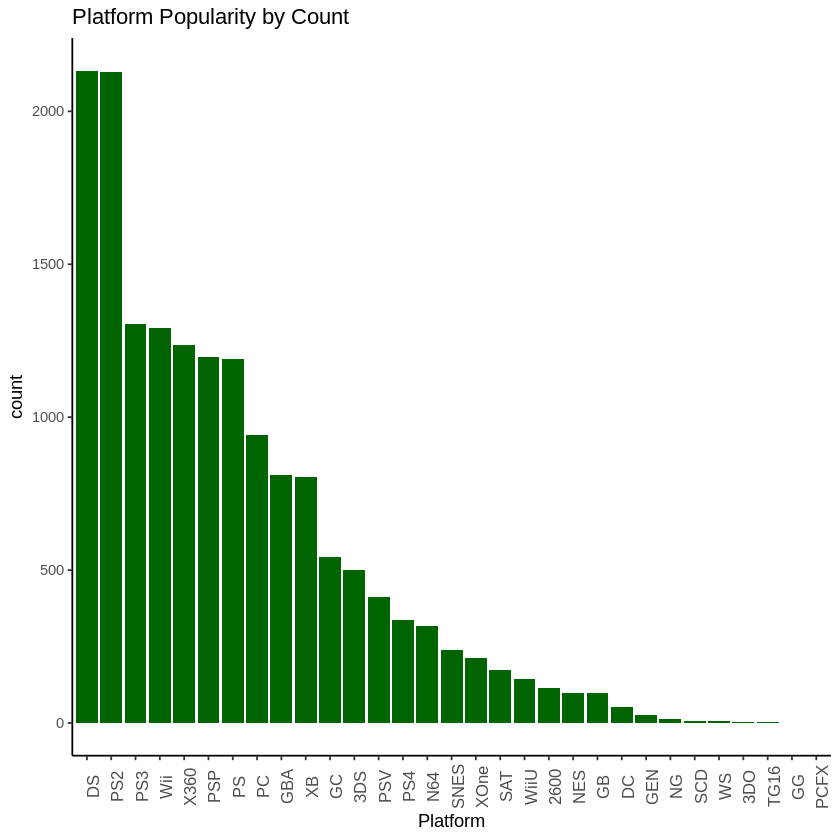

In [ ]:
plat <- vgs %>%
group_by (Platform) %>%
summarize(count = n())
ggplot(plat, aes(x = reorder(Platform, - count), y = count)) + geom_col(fill = "Dark Green") + theme_classic() + labs(title = "Platform Popularity by Count", x = "Platform") + theme(axis.text.x = element_text(size = 10, angle = 90))

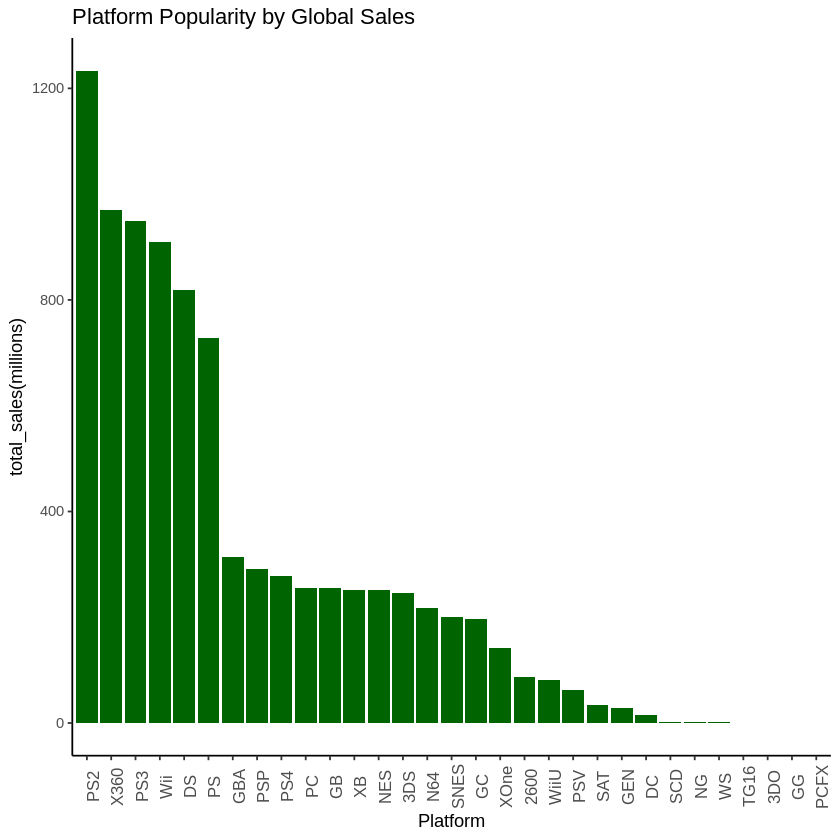

In [ ]:
platform <- vgs %>%
filter(Year < 2017) %>%
group_by (Platform) %>%
summarize(total_sales = sum(Global_Sales))
ggplot(platform, aes(x = reorder(Platform, - total_sales), y = total_sales)) + geom_col(fill = "Dark Green") + labs(title = "Platform Popularity by Global Sales", x = "Platform", y = "total_sales(millions)") + theme_classic() + theme(axis.text.x = element_text(size = 10, angle = 90))

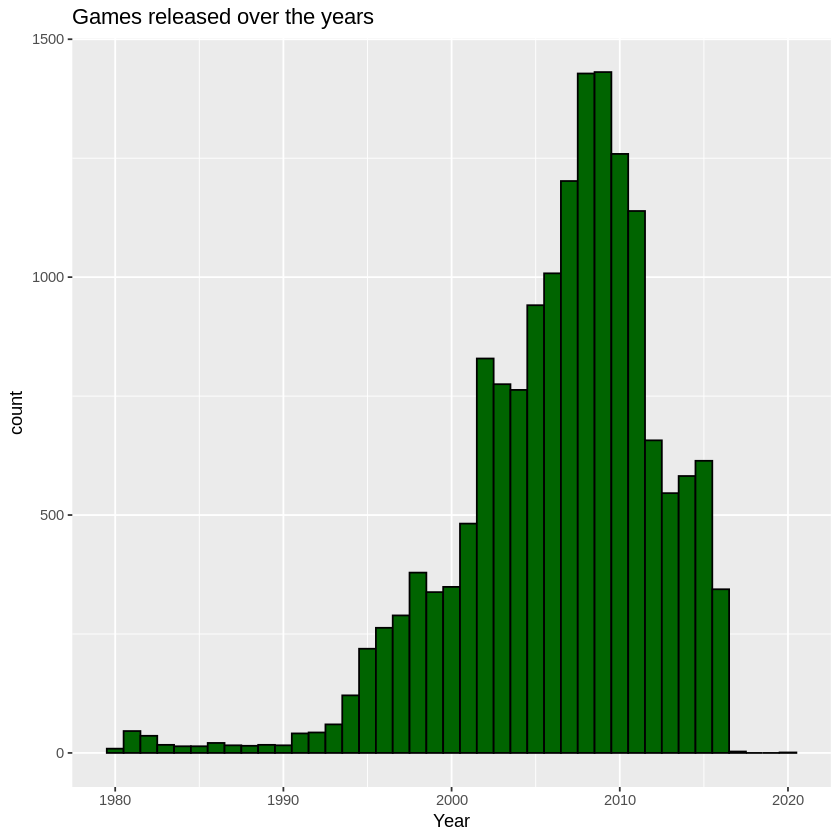

In [ ]:
ggplot(data = vgs, aes(x = Year)) + geom_histogram(binwidth = 1, fill = "Dark green", color = "black") + labs(title = "Games released over the years")

`summarise()` has grouped output by 'Genre'. You can override using the
`.groups` argument.


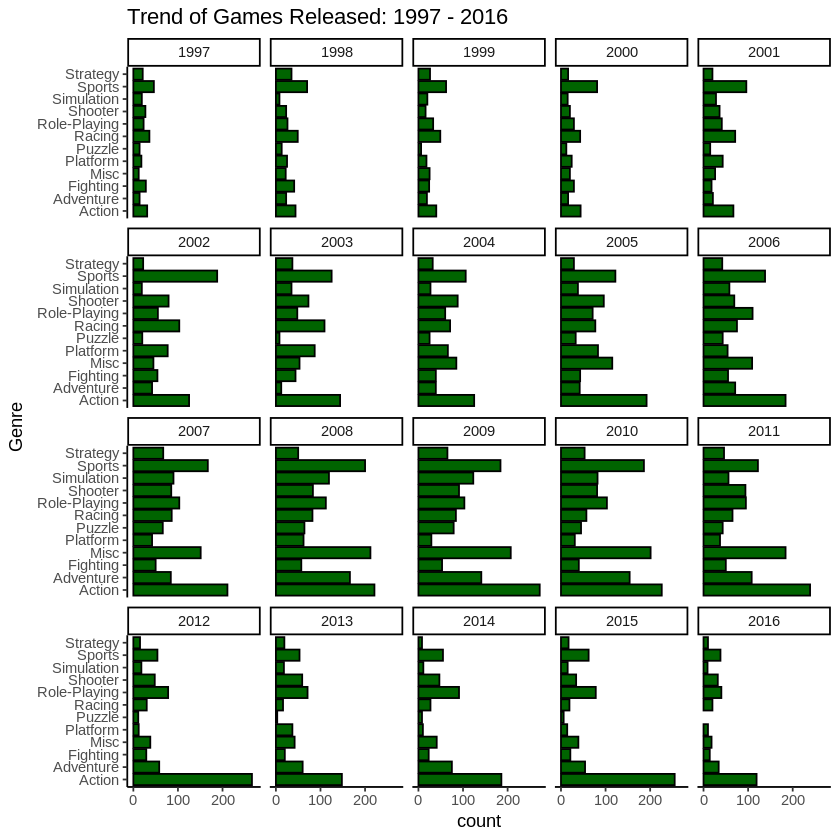

In [ ]:
wrap <- vgs %>%
filter (Year >=1997) %>%
filter (Year < 2017) %>%
group_by(Genre, Year) %>%
summarize(count = n())
ggplot(data = wrap, aes(x = count, y = Genre)) + geom_col(fill = "Dark Green", color = "Black") + facet_wrap(~Year) + theme_classic() + labs(title = "Trend of Games Released: 1997 - 2016")

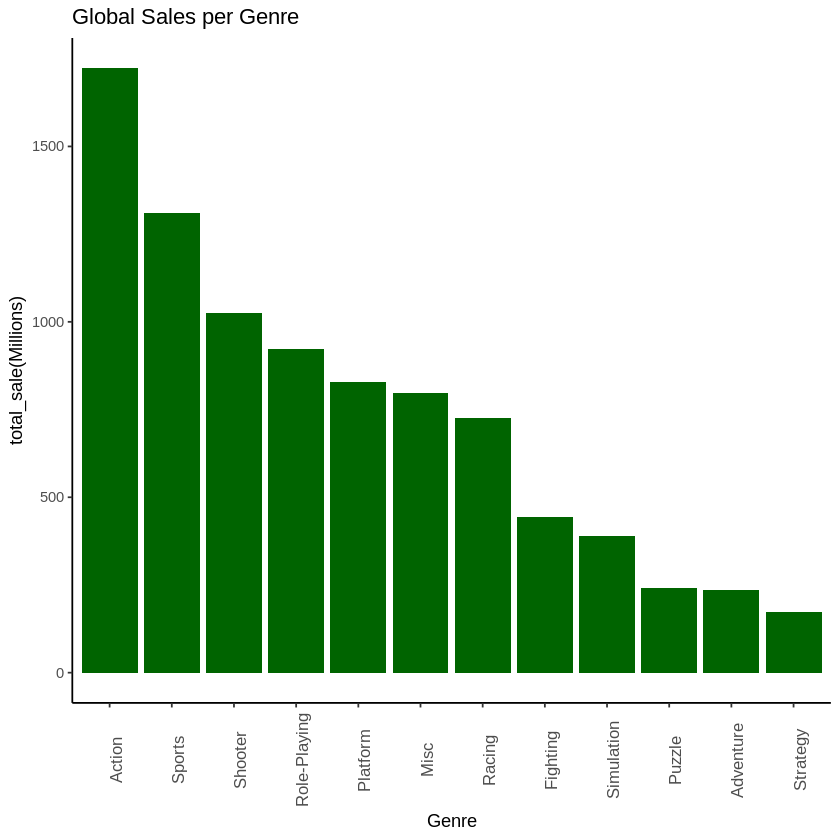

In [ ]:
vgs%>%
group_by (Genre) %>%
summarize (total_sale = sum(Global_Sales)) %>%
ggplot(aes(x = reorder(Genre, - total_sale), y = total_sale)) + geom_col(fill = "Dark Green") + labs(title = "Global Sales per Genre", x = "Genre", y = "total_sale(Millions)")+ theme_classic() + theme(axis.text.x= element_text(size =10, angle = 90))

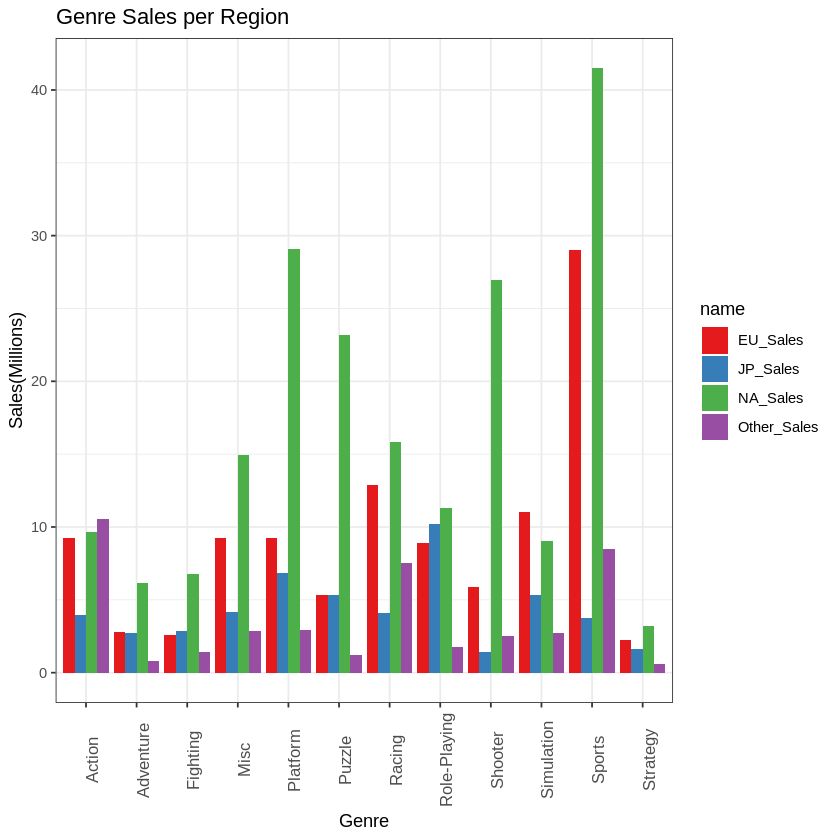

In [ ]:
sale = vgs %>%
subset(select = c(Genre, NA_Sales, EU_Sales, JP_Sales, Other_Sales)) %>%
group_by (Genre) %>%
pivot_longer(c("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"), values_to = "Sales")
ggplot(sale, aes(x = Genre, y = Sales, fill = name)) + geom_col(position = "dodge") + labs(title = "Genre Sales per Region", x= "Genre", y = "Sales(Millions)") + theme_bw() + theme(axis.text.x= element_text(size =10, angle = 90)) + scale_fill_brewer(palette = "Set1")


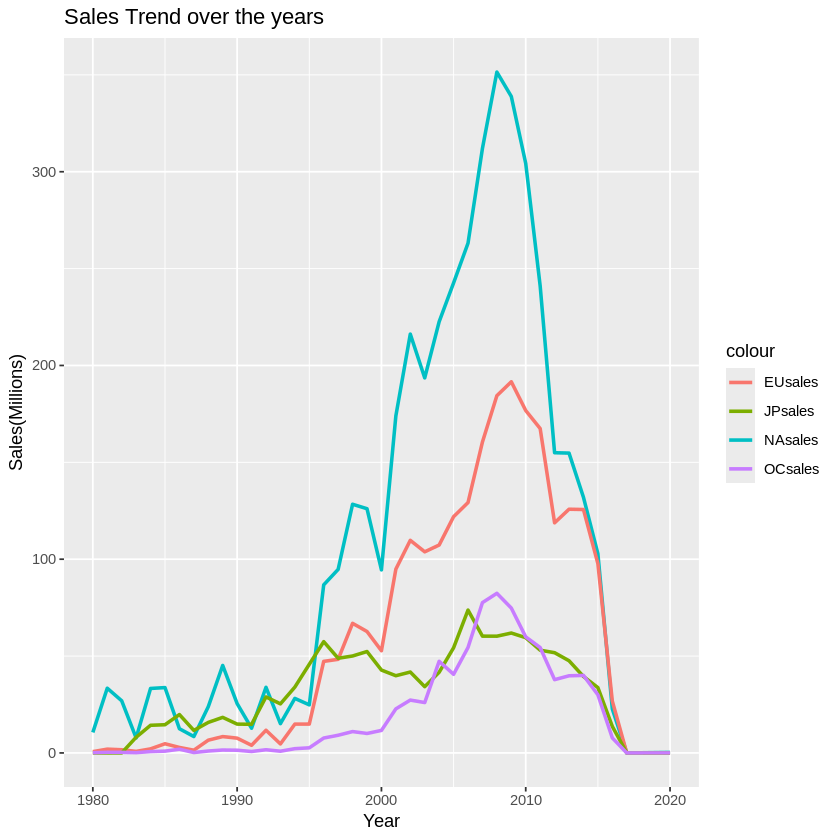

In [ ]:
vgs %>%
subset(select = c(Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)) %>%
group_by (Year) %>%
summarize(NAsales = sum(NA_Sales),EUsales = sum(EU_Sales),JPsales = sum(JP_Sales),OCsales = sum(Other_Sales),Global = sum(Global_Sales)) %>%
ggplot() + geom_line(aes(x = Year, y = NAsales, colour = "NAsales"), size = 1) + geom_line(aes(x = Year, y = EUsales, colour = "EUsales"), size = 1) + geom_line(aes(x = Year, y = JPsales, colour = "JPsales"), size = 1) + geom_line(aes(x = Year, y = OCsales, colour = "OCsales"), size = 1) + labs(title = "Sales Trend over the years", y = "Sales(Millions)")

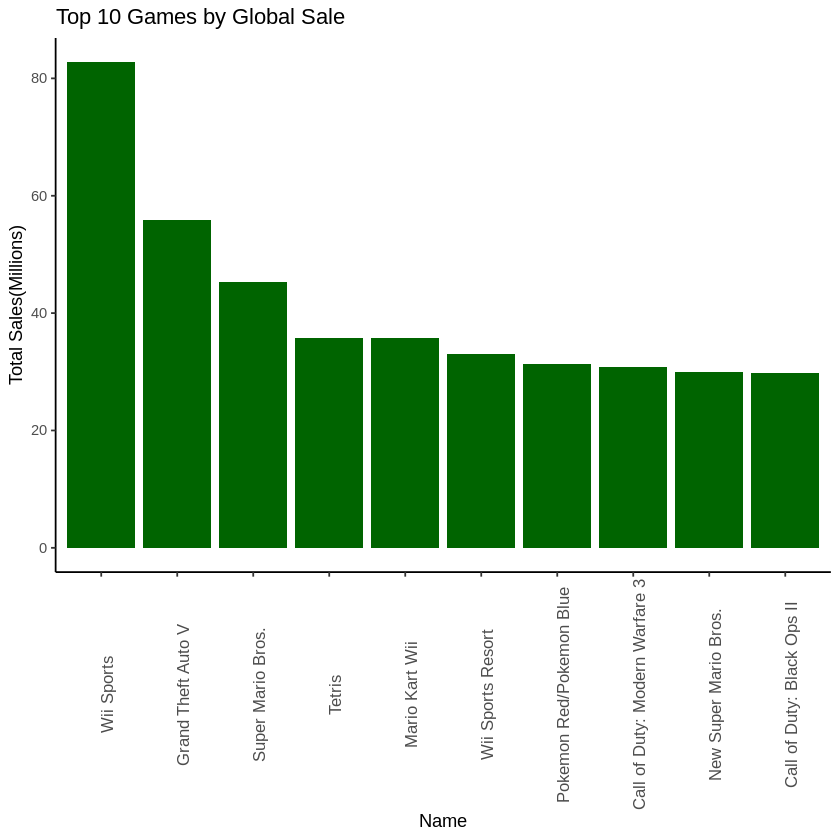

In [ ]:
vgs %>%
group_by(Name)%>%
summarize(total = sum(Global_Sales)) %>%
arrange(desc(total)) %>%
slice(1:10) %>%
ggplot(aes(x = reorder(Name, -total), y = total)) + geom_col( fill = "Dark Green") + labs(title = "Top 10 Games by Global Sale", x= "Name", y = "Total Sales(Millions)") + theme_classic() + theme(axis.text.x= element_text(size =10, angle = 90))